<a href="https://colab.research.google.com/github/ManJ-PC/HelloCodeSchoolProject/blob/master/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criar um classificador binário de imagens utilizando Keras e Tensorflow.

Para isso deixo ao teu critério escolheres 2 classes para construir o classificador.
Como dataset para treino usa 70% do dataset, 20% para test e 10% para validação.

Parafraseando este [artigo](https://https://repositorio-aberto.up.pt/bitstream/10216/129193/2/418655.pdf): "A validação em machine learning é o processo de avaliar um modelo treinado num conjunto de
dados de teste de modo a estimar a sua capacidade de generalização em novos contextos. Assim,
permite identificar situações como o sobreajuste (do inglês overfitting), na qual um modelo está
demasiado adaptado aos dados de treino. Geralmente os dados são divididos em três partes: treino,
validação e teste. Pela mesma ordem, estes são usados para o treino do modelo, ajuste dos hiperparâmetros, e na avaliação imparcial do modelo final. Este método de separação é denominado de
validação cruzada holdout."

In [ ]:
pip install Pillow

In [ ]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [ ]:
import tensorflow as tf
import numpy as np
import PIL.Image as PImage
import matplotlib.pyplot as plt

IMAGE_RES = 224  # resize das imagens para correrem na imagenet 224 linhas,224 colunas,3 canais

# Load Mobilenet model



In [ ]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet') # Rede pré-treinada, estrutura da MobileNet2 (tem mil classes)
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

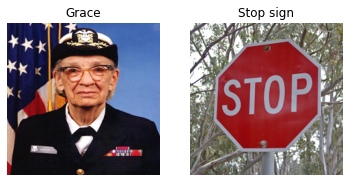

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

image_path = tf.keras.utils.get_file('grace_hopper.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
image1 = PImage.open(image_path).resize((IMAGE_RES, IMAGE_RES))
image_path = tf.keras.utils.get_file('STOP.jpg', 'https://upload.wikimedia.org/wikipedia/commons/f/f9/STOP_sign.jpg')
image2 = PImage.open(image_path).resize((IMAGE_RES, IMAGE_RES))

plt.subplot(1,2,1)
plt.imshow(image1)
plt.axis('off')
_ = plt.title("Grace")

plt.subplot(1,2,2)
plt.imshow(image2)
plt.axis('off')
_ = plt.title("Stop sign")

plt.show()

# Make a test batch

In [ ]:
x1 = np.array(image1) #matriz 4D ao invês de 3D,  dou a primeira img, pacote de imagens para a rede. 1º el. 1a img, 2ºel. 2a img 
x2 = np.array(image2) #batch o conj. das duas iamgens
print("x1.shape:", x1.shape)
print("x1.shape:", x1.shape)
x=np.zeros( (2,IMAGE_RES, IMAGE_RES, 3)) # 2 elementos
#x = x1[np.newaxis, ...]
x[0] = x1 # 1st batch item 
x[1] = x2 # 2nd batch item

print("batch shape", x.shape)
#x = x / 255.0
x = x / 255.0 # rede treinada com píxeis, entre -1 e 1 ... adjusts: pass values between [0, 255] to [-1,1], 3 canais destes píxeis
x = x * 2.0
x = x - 1.0

x1.shape: (224, 224, 3)
x1.shape: (224, 224, 3)
batch shape (2, 224, 224, 3)


#Use the model to predict classes

In [ ]:
result = model.predict(x) # parameter: batch
print(result.shape) # cada um dos resultaados são mil probabilidades!
predicted_class1 = np.argmax(result[0], axis=-1) # class position most probable for img1
print("predicted_class1:", predicted_class1)
predicted_class2 = np.argmax(result[1], axis=-1)
print("predicted_class2:", predicted_class2)

predicted_class_name1 = imagenet_labels[predicted_class1+1]
print("predicted_class_name1:", predicted_class_name1)
predicted_class_name2= imagenet_labels[predicted_class2+1]
print("predicted_class_name2:", predicted_class_name2)

(2, 1000)
predicted_class1: 652
predicted_class2: 919
predicted_class_name1: military uniform
predicted_class_name2: street sign


# Custom Image Classifier

In [ ]:
import fastai
fastai.__version__

'1.0.61'

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# with open('/content/gdrive/MyDrive/') as f:
#   ('Hello Google Drive!')
# !cat /content/gdrive/MyDrive/


IsADirectoryError: ignored

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/ColabNotebooks")
!ls


 Beagle
'Copy of VCMI_Tutorials_2020__4_Pytorch,_torchvision_and_PIL_Eduardo_Castro.ipynb'
'Copy of WIP_VCMI_Tutorials_2020_#3_OpenCV_Skimage_and_Keras_in_GoogleColab_IsabelRioTorto_and_TiagoGoncalves'
 Custom-Image-Classifier
 Custom_Image_Classifier.ipynb
 Desafio.ipynb
 Pinscher
 Untitled0.ipynb


# Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
# pip install kaggle
# mkdir ~/.kaggle
# cp kaggle.json ~/.kaggle/
# ls -l
# #chmod 600 ~/.kaggle/kaggle.json
# #kaggle competi

In [ ]:
scores = cross_val_scores(model. )


SyntaxError: ignored